# Interpolação via Newton

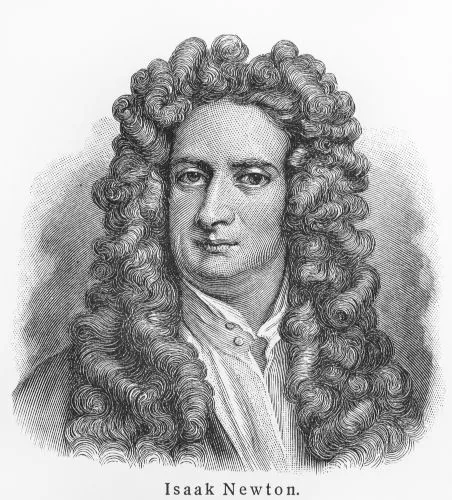

O método de Newton se baseia em algumas restrições e peculiaridades para sua resolução. Essas restrições são plenamente definidas no teorema que se segue:

<h5>Teorema</h5>

Seja <b>f(x) contínua</b> e com tantas derivadas contínuas quanto necessárias num intervalo [a, b]. Sejam $a = x_{0} < x_{1}< x_{2} < ... < x_{n} = b$, $n+1$ pontos. A forma de Newton para o polinômio de grau $\le n$ que interpola <b>f(x)</b> em $x_{0}, ...,  x_{n}$ é dada por

$P_{n}(x) = f(x_{0}) + (x - x_{0})f[x_{0}, x_{1}] + (x - x_{0})(x - x_{1})f[x_{0}, x_{1}, x_{2}] + ... + (x - x_{0})(x - x_{1})...(x - x_{n-1})f[x_{0}, x_{1}, ... , x_{n}]$

Com isso, podemos afirmar que seu erro é:

$E_{n}(x) = (x - x_{0})(x - x_{1})...(x - x_{n}) \cdot max\mid f[x_{0}, x_{1}, ... , x_{n+1}, x]\mid$

Para entender melhor o operador f[.], faremos a seguinte ilustração:

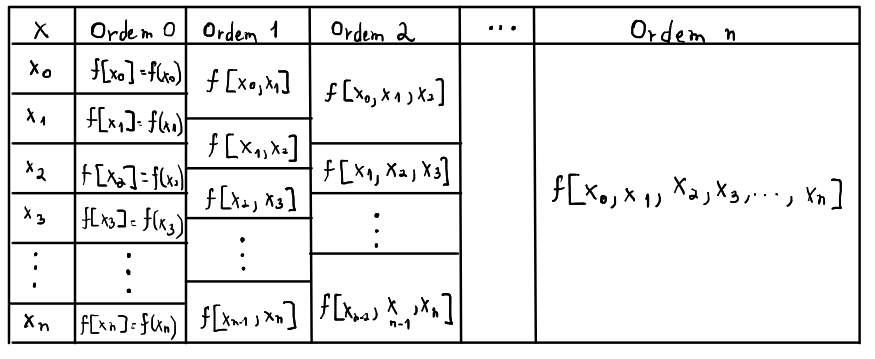

Note as seguintes características:

<b>Operadores f[.] de ordem 0 são iguais aos valores originais dos dados, i.e.: </b>

$f[x_{0}] = f(x_{0})$

<b>Os operadores dependem diretamente do de ordem anterior a sua. Exemplo disso é:</b>

$f[x_{1}, x_{2}, x_{3}] = \frac{f[x_{2}, x_{3}] - f[x_{1}, x_{2}]}{(x_{3} - x_{1})} = \frac{\frac{f(x_{3})-f(x_{2})}{(x_{3} - x_{2})}-\frac{f(x_{2})-f(x_{1})}{(x_{2} - x_{1})}}{(x_{3} - x_{1})}$

Dessa forma, notamos que isso tende a escalar cada vez mais. Por isso, vamos ver como resolver um caso disso em Python.

In [84]:
import pandas as pd # Importação das libs necessárias para preparar o algoritmo
import numpy as np
import matplotlib.pyplot as plt 

n = int(input("Insira a quantidade de pontos a serem incluidos na curva interpoladora: ")) # Input para buscar a quantidade de Polinômios de Lagrange necessárias para criação da função interpoladora

x = np.zeros((n)) # Criando um array de zeros de tamanho n
y = np.zeros((n)) # Criando um array de zeros de tamanho n

print("Digite os dados para x: ")
for i in range(n): # Loop for para que o usuário possa inserir manualmente os dados de x
    x[i] = float(input(f'x[{i}] = '))

print("Digite os dados para y: ")
for i in range(n): # Loop for para que o usuário possa inserir manualmente os dados de y
    y[i] = float(input(f'y[{i}] = '))

# -=-=-=-=-=-=-=-=-=-=- Calculando os operadores de diferença dividida (f[.]) -=-=-=-=-=-=-=-=-=-=-

ddf_matrix = [[None for i in range(n)] for i in range(n)] # Criando uma matriz n x n

for i in range(n):
    ddf_matrix[i][0] = y[i] # Aqui afirmamos que o operador diferença dividida f[xi] = f(xi), na coluna de Ordem 0

for i in range(1, n): # Iterando sobre as colunas de Ordem 1 até Ordem n
    for j in range(n-i): # Aqui iteramos sobre um número n-i de linhas, visto que conforme passamos de coluna, a quantidade de linhas diminui uma qtde. n em relação a coluna anterior
        ddf_matrix[j][i] = round((ddf_matrix[j+1][i-1] - ddf_matrix[j][i-1])/(x[j+i] - x[j]), 3) # Aqui estamos montando o algoritmo da diferença dividida

ddf_table = pd.DataFrame(ddf_matrix) # Guardando os resultados da matriz em um DataFrame Pandas
coefficients = ddf_matrix[0] # Pega todos os primeiros termos da primeira linha do DataFrame, visto que esses são os coeficientes do polinômio interpolador

col_names = {i: f'Ordem {i}' for i in range(n)} # Iterando sobre os nomes das colunas do DataFrame
ddf_table.rename(columns=col_names, inplace=True) # Formatando o nome das colunas do DataFrame

df = pd.DataFrame({'x': x, 'y': y}) # Transformando os valores de x e y em um DataFrame
print('\n')
print(df) # Apresentando os dados x e y inseridos
print('\n')
print('Tabela de operadores Diferença Dividida: ')
display(ddf_table) # Imprimindo em formato de display o DataFrame correspondente
print('\n')
print('Coeficientes das diferenças divididas (de f[x0] até f[x0, x1, ..., xn]):')
print(coefficients)

Digite os dados para x: 
Digite os dados para y: 


     x     y
0  0.0  19.1
1 -1.0  19.1
2 -2.0  19.0
3 -3.0  18.8


Tabela de operadores Diferença Dividida: 


,Ordem 0,Ordem 1,Ordem 2,Ordem 3
0,19.1,-0.0,-0.05,-0.0
1,19.1,0.1,-0.05,NaN
2,19.0,0.2,NaN,NaN
3,18.8,NaN,NaN,NaN




Coeficientes das diferenças divididas (de f[x0] até f[x0, x1, ..., xn]):
[19.1, -0.0, -0.05, -0.0]


In [86]:
# -=-=-=-=-=-=-=-=-=-=- Calculando o valor f(x) na curva interpoladora de um ponto x qualquer  -=-=-=-=-=-=-=-=-=-=-
x_guess = float(input('Insira o valor de x que deseja calcular na curva interpoladora:'))

n_coefficients = len(coefficients) # Número de coefiencientes, para saber a ordem com a qual estamos lidando
p = np.zeros_like(x_guess, dtype=float) # Inicializando um array unidimensional com zeros para armazenar o resultado
for i in range(n_coefficients):
    term = coefficients[i] # Termo inicial é o coeficiente
    # Multiplica pelos fatores (x_values - x[j]) conforme esses se acumulam!
    for j in range(i):
        term *= (x_guess - x[j])
    p += term # Adiciona o termo ao valor total do polinômio

print(f'O valor de f(x) para x = {x_guess} é: y = {p}')

O valor de f(x) para x = -7.5 é: y = 16.6625


Agora, retomando que o erro é tal que:

$\mid E_{n}(x) \mid  =  \mid(x - x_{0})(x - x_{1})...(x - x_{n})\mid \cdot máx\mid f[x_{0}, x_{1}, ... , x_{n+1}, x]\mid$

então precisaremos do operador Diferença Dividida de ordem n+1! Assim, fazemos:

In [87]:
# -=-=-=-=-=-=-=-=-=-=- Calculando o erro da interpolação -=-=-=-=-=-=-=-=-=-=-

x_new = np.array([float(input('Digite o próximo valor de x para criar um novo operador de Diferença Dividida'))])
y_new = np.array([float(input('Agora, digite o valor de y correspondente a essa adição: '))])

x = np.append(x, x_new)
y = np.append(y, y_new)

k = n+len(x_new)

ddf_matrix = [[None for i in range(k)] for i in range(k)] # Criando uma matriz k x k


for i in range(k):
    ddf_matrix[i][0] = y[i] # Aqui afirmamos que o operador diferença dividida f[xi] = f(xi), na coluna de Ordem 0

for i in range(1, k): # Iterando sobre as colunas de Ordem 1 até Ordem n
    for j in range(k-i): # Aqui iteramos sobre um número n-i de linhas, visto que conforme passamos de coluna, a quantidade de linhas diminui uma qtde. n em relação a coluna anterior
        ddf_matrix[j][i] = round((ddf_matrix[j+1][i-1] - ddf_matrix[j][i-1])/(x[j+i] - x[j]), 3) # Aqui estamos montando o algoritmo da diferença dividida

ddf_table = pd.DataFrame(ddf_matrix) # Guardando os resultados da matriz em um DataFrame Pandas
col_names = {i: f'Ordem {i}' for i in range(k)} # Iterando sobre os nomes das colunas do DataFrame
ddf_table.rename(columns=col_names, inplace=True) # Formatando o nome das colunas do DataFrame

print('\n')
print('Tabela de operadores Diferença Dividida: ')
display(ddf_table) # Imprimindo em formato de display o DataFrame correspondente
print('\n')

wished_column = int(input('Digite o número da Ordem n+1 desejada para estimar o erro de um polinômio de grau n: '))

max_diff = np.max(np.abs(ddf_table.iloc[:, wished_column]))  # Máxima diferença dividida de ordem n+1 desejada
error = max_diff  # Inicializa o erro com a máxima diferença dividida

product_term = 1
for xi in list(x):
    product_term *= (x_guess - xi)  # Produto dos termos (x - xi)
    
error *= np.abs(product_term)  # Calcula o erro total multiplicando pela diferença dividida máxima
print(product_term)
print(f'Diferença dividida máxima de ordem {wished_column}: {max_diff}')

df = pd.DataFrame({'x': x, 'y': y}) # Transformando os valores de x e y em um DataFrame
print('\n')
print(df) # Apresentando os dados x e y inseridos
print('\n')
print(f'O erro da interpolação é: {error}')




Tabela de operadores Diferença Dividida: 


,Ordem 0,Ordem 1,Ordem 2,Ordem 3,Ordem 4
0,19.1,-0.0,-0.05,-0.000,0.008
1,19.1,0.1,-0.05,-0.033,NaN
2,19.0,0.2,0.05,NaN,NaN
3,18.8,0.1,NaN,NaN,NaN
4,18.7,NaN,NaN,NaN,NaN




-4222.96875
Diferença dividida máxima de ordem 4: 0.008


     x     y
0  0.0  19.1
1 -1.0  19.1
2 -2.0  19.0
3 -3.0  18.8
4 -4.0  18.7


O erro da interpolação é: 33.78375
